In [460]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import fiona
import matplotlib
import glob
import pandas as pd

## Predefined functions

In [356]:
def get_metrics(pred_path):
    src = rasterio.open(pred_path)
    raw = np.array(src.read())
    y_pred = (raw == 1) # chicken
    y_pred = y_pred.astype(int)
    y_pred = y_pred.squeeze()
    
    src_masked = rasterio.open("./m_3807537_ne_18_1_20170611_rasterized2.tif")
    y_true = np.array(src_masked.read())
    y_true = y_true.squeeze()
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    assert tp + tn + fp + fn == y_true.size

    n = tp + fp + tn + fn

    acc = (tp+tn)/n
    recall = (tp/(tp+fn))
    precision = tp / (tp + fp)
    iou = tp /(tp + fn + fp)

    print("IOU: {}".format(iou))
    print("Accuracy: {}".format(acc))
    print("Precision: {}".format(precision))
    print("Recall: {}".format(recall))
    return iou, acc, precision, recall

In [348]:
one_for_all = [
    "#FFFFFF",
    "#FF0000"
]
one_for_all_cmap = matplotlib.colors.ListedColormap(one_for_all)
plt.rcParams["figure.figsize"] = (20,10)
def plot_tile(path):
    src = rasterio.open(path)
    plt.imshow(src.read(1),vmin=0, vmax=2, cmap=one_for_all_cmap)
    plt.show()

In [333]:
metrics = {}
all_metrics = []

# Iterations

In [5]:
import re
experiments = glob.glob("../landcover_scripts/new/experiment*")
experiments.sort(key=lambda f: int(re.sub('\D', '', f)))

for e in experiments:
    ename = (e.split("/")[-1])
    mtypes = (glob.glob(e+ "/test_inference*/"))
    print(ename)
    for m in mtypes:
        model_res_files = (glob.glob(m + "/*"))
        model_res_files.sort(key=lambda f: int(re.sub('\D', '', f)))
        print(m)
        for f in model_res_files:
            print(f)
            fname = (f.split('/')[-1].split("_"))
            temp = {}
            temp['experiment'] = ename
            temp['model'] = fname[0]
            temp['sampling'] = fname[3]
            temp['epoch'] = fname[4]
            temp_metrics = [*get_metrics(f)]
            temp['iou'] = temp_metrics[0]
            temp['acc'] = temp_metrics[1]
            temp['precision'] = temp_metrics[2]
            temp['recall'] = temp_metrics[3]
            all_metrics.append(temp)

3807537_1.tif
3807537_2.tif
3807537_3.tif
3807537_4.tif
3807537_5.tif
3807537_6.tif
3807537_7.tif
3807537_8.tif
3807537_9.tif
3807537_10.tif


In [ ]:
import re
experiments = glob.glob("../landcover_scripts/new/experiment*")
experiments.sort(key=lambda f: int(re.sub('\D', '', f)))

for e in experiments:
    ename = (e.split("/")[-1])
    mtypes = (glob.glob(e+ "/test_inference*/"))
    print(ename)
    for m in mtypes:
        model_res_files = (glob.glob(m + "/*"))
        model_res_files.sort(key=lambda f: int(re.sub('\D', '', f)))
        print(m)
        for f in model_res_files:
            print(f)
            fname = (f.split('/')[-1].split("_"))
            temp = {}
            temp['experiment'] = ename
            temp['model'] = fname[0]
            temp['sampling'] = fname[3]
            temp['epoch'] = fname[4]
            temp_metrics = [*get_metrics(f)]
            temp['iou'] = temp_metrics[0]
            temp['acc'] = temp_metrics[1]
            temp['precision'] = temp_metrics[2]
            temp['recall'] = temp_metrics[3]
            all_metrics.append(temp)

## View Results

In [26]:
!cd ../landcover_scripts/new/experiment1/test_inference_ae_uneven/; ls

In [250]:
xtrain = np.load('../landcover_scripts/xtrain.npy')
ytrain = np.load('../landcover_scripts/ytrain.npy')

In [ ]:
cd ../landcover_scripts

In [251]:
gd_xtrain = np.load('../landcover_scripts/gd_xtrain.npy')
gd_ytrain = np.load('../landcover_scripts/gd_ytrain.npy')

In [422]:
import re
experiments = glob.glob("../landcover_scripts/m_3807537_*")
experiments.sort(key=lambda f: int(re.sub('\D', '', f)))
metrics = {}
all_metrics_50 = []

for e in experiments:
    temp = {}
    temp['file'] = e
    print(temp)
    temp_metrics = [*get_metrics(e)]
    temp['iou'] = temp_metrics[0]
    temp['acc'] = temp_metrics[1]
    temp['precision'] = temp_metrics[2]
    temp['recall'] = temp_metrics[3]
    all_metrics_50.append(temp)

{'file': '../landcover_scripts/m_3807537_1.tif'}
IOU: 0.34691324989560146
Accuracy: 0.9860985629916078
Precision: 0.34787443158603
Recall: 0.9920983674983768
{'file': '../landcover_scripts/m_3807537_2.tif'}
IOU: 0.2803434892327571
Accuracy: 0.9810621512709906
Precision: 0.2810467293406736
Recall: 0.9911534180502737
{'file': '../landcover_scripts/m_3807537_3.tif'}
IOU: 0.3564733793475933
Accuracy: 0.9868384909232831
Precision: 0.35915081305133384
Recall: 0.9795154670253223
{'file': '../landcover_scripts/m_3807537_4.tif'}
IOU: 0.46145049411398525
Accuracy: 0.991638076515314
Precision: 0.46987222205715273
Recall: 0.9626107272052685
{'file': '../landcover_scripts/m_3807537_5.tif'}
IOU: 0.24438940194665384
Accuracy: 0.9770959338914867
Precision: 0.24467343716152276
Recall: 0.9952723541415454
{'file': '../landcover_scripts/m_3807537_6.tif'}
IOU: 0.16335001353995432
Accuracy: 0.9621391028265954
Precision: 0.16353448234715745
Recall: 0.9931418699564047
{'file': '../landcover_scripts/m_3807537_

In [413]:
import re
experiments = glob.glob("../landcover_scripts/m_3807537_*")
experiments.sort(key=lambda f: int(re.sub('\D', '', f)))
metrics = {}
all_metrics_25 = []

for e in experiments:
    temp = {}
    temp['file'] = e
    print(temp)
    temp_metrics = [*get_metrics(e)]
    temp['iou'] = temp_metrics[0]
    temp['acc'] = temp_metrics[1]
    temp['precision'] = temp_metrics[2]
    temp['recall'] = temp_metrics[3]
    all_metrics_25.append(temp)

{'file': '../landcover_scripts/m_3807537_1.tif'}
IOU: 0.37788916080374785
Accuracy: 0.9886031767538014
Precision: 0.3889362960664433
Recall: 0.9300911325480011
{'file': '../landcover_scripts/m_3807537_2.tif'}
IOU: 0.2296178468251137
Accuracy: 0.9757272527608141
Precision: 0.2311471330462577
Recall: 0.9719935534737038
{'file': '../landcover_scripts/m_3807537_3.tif'}
IOU: 0.18465561519278664
Accuracy: 0.9673474438009892
Precision: 0.18487772068179328
Recall: 0.9935360819961042
{'file': '../landcover_scripts/m_3807537_4.tif'}
IOU: 0.2699861379686325
Accuracy: 0.9800371776245587
Precision: 0.27058110039977734
Recall: 0.9919215518040998
{'file': '../landcover_scripts/m_3807537_5.tif'}
IOU: 0.23585324753851786
Accuracy: 0.9759518891506147
Precision: 0.23600841042316228
Recall: 0.9972202253965309
{'file': '../landcover_scripts/m_3807537_6.tif'}
IOU: 0.1297435501932239
Accuracy: 0.9503363936409692
Precision: 0.1298321462498009
Recall: 0.9947679946201651
{'file': '../landcover_scripts/m_3807537

In [414]:
import re
experiments = glob.glob("../landcover_scripts/test_run_1/tmp_ae_even_5000_test/m_3807537_*")
experiments.sort(key=lambda f: int(re.sub('\D', '', f)))
metrics = {}
all_metrics = []

for e in experiments:
    temp = {}
    temp['file'] = e
    print(temp)
    temp_metrics = [*get_metrics(e)]
    temp['iou'] = temp_metrics[0]
    temp['acc'] = temp_metrics[1]
    temp['precision'] = temp_metrics[2]
    temp['recall'] = temp_metrics[3]
    all_metrics.append(temp)

{'file': '../landcover_scripts/test_run_1/tmp_ae_even_5000_test/m_3807537_1.tif'}
IOU: 0.27352777388240995
Accuracy: 0.9806642911418786
Precision: 0.27521252223500886
Recall: 0.9781096373249235
{'file': '../landcover_scripts/test_run_1/tmp_ae_even_5000_test/m_3807537_2.tif'}
IOU: 0.03772136607902139
Accuracy: 0.8119448221225852
Precision: 0.037735142667630575
Recall: 0.9904142704758371
{'file': '../landcover_scripts/test_run_1/tmp_ae_even_5000_test/m_3807537_3.tif'}
IOU: 0.1955822922026346
Accuracy: 0.9722064031295482
Precision: 0.19954131070466144
Recall: 0.907899313607272
{'file': '../landcover_scripts/test_run_1/tmp_ae_even_5000_test/m_3807537_4.tif'}
IOU: 0.054545138296685
Accuracy: 0.8733459818953253
Precision: 0.054600652153095085
Recall: 0.9817010249513032
{'file': '../landcover_scripts/test_run_1/tmp_ae_even_5000_test/m_3807537_5.tif'}
IOU: 0.15821110168586983
Accuracy: 0.9612053041113292
Precision: 0.15873394605724936
Recall: 0.9796053241814303
{'file': '../landcover_scripts/t

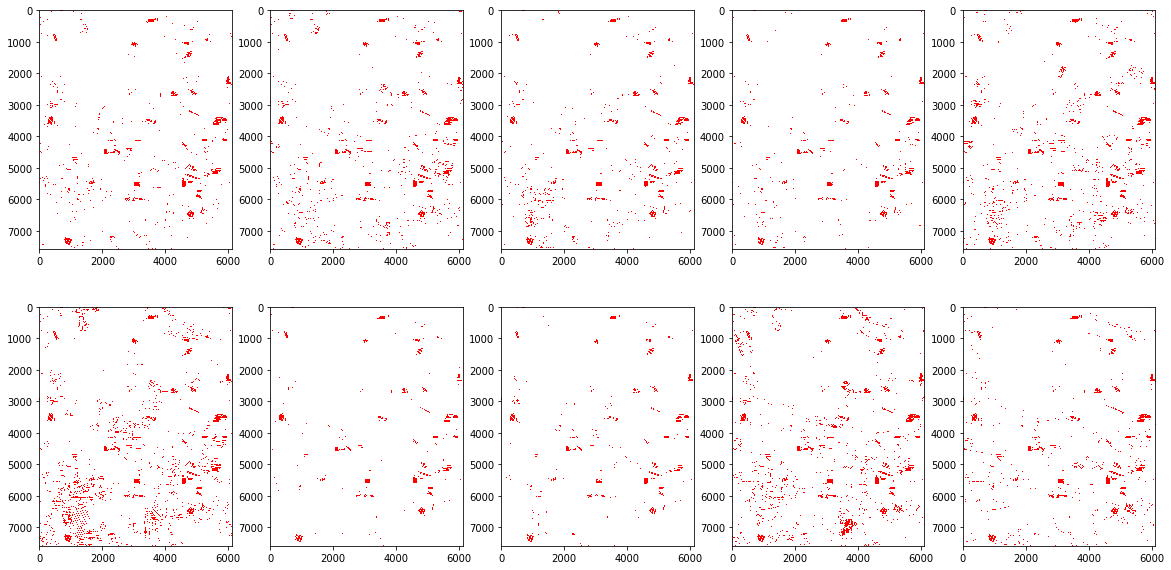

In [423]:
fig, ax = plt.subplots(2,5)
count = 0
big_count = 0
for i in experiments:
    src = rasterio.open(i)
    ax[big_count,count].imshow(src.read(1),vmin=0, vmax=2, cmap=one_for_all_cmap)
    count+=1
    if count == 5:
        count = 0
        big_count+=1

Text(0, 0.5, 'Precision')

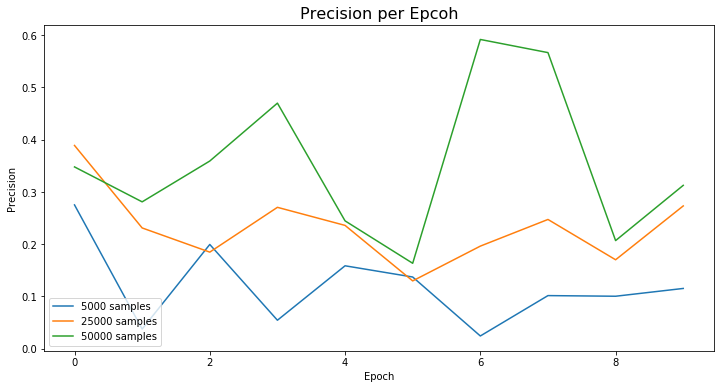

In [429]:
df = pd.DataFrame(all_metrics)
df_25 = pd.DataFrame(all_metrics_25)
df_50 = pd.DataFrame(all_metrics_50)
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df.precision, label="5000 samples")
ax.plot(df_25.precision, label="25000 samples")
ax.plot(df_50.precision, label="50000 samples")
plt.title("Precision per Epcoh", fontsize=16)
plt.legend(loc='lower left',prop={'size': 10})

plt.xlabel("Epoch")
plt.ylabel("Precision")

In [316]:
f = rasterio.open("../landcover_scripts/binary_raster_md_tif/m_3807539_nw_18_1_20170611_inference_rasterized.tif", "r")
target = f.read().squeeze()
f.close()

# Poultry pixels
y_ind,x_ind = np.where(target==1)

In [325]:
(target == 1).mean()

0.0038387613699418606

In [321]:
len(y_ind), len(x_ind)

(177298, 177298)

In [223]:
raw = raw.squeeze()

In [224]:
raw

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [118]:
x_ind,y_ind = np.where(raw==1)

In [119]:
raw.shape

(7586, 6110)

In [61]:
np.random.randint(0,len(x_ind))

13750

In [63]:
x_ind[1]

3220

In [47]:
len(np.unique(raw))

2

In [112]:
temp.loc[temp['iou'].idxmax()]

iou          0.580091
acc          0.996123
precision    0.755853
recall       0.717647
Name: (ae, even, 07), dtype: float64

In [6]:
df = pd.DataFrame(all_metrics)
temp = df.groupby(['model', 'sampling'])
temp.mean()

iou       acc  precision    recall
model sampling                                         
ae    even      0.512503  0.994013   0.645399  0.737562
      uneven    0.513756  0.993378   0.577458  0.841697
sup   even      0.382851  0.985267   0.543049  0.686421
      uneven    0.341361  0.974602   0.412274  0.773958

In [106]:
temp = df.groupby(['model', 'sampling', 'epoch'])
temp = temp.std()
temp.to_csv('redo_all_std.csv')

In [107]:
temp = df.groupby(['model', 'sampling', 'epoch'])
temp = temp.mean()
temp.to_csv('redo_all_mean.csv')

In [18]:
df = pd.read_csv('redo_all_mean.csv')

In [19]:
df.loc[df.model == 'ae', 'model'] = 'Self-supervised'
df.loc[df.model == 'sup', 'model'] = 'Supervised'
df.loc[df.model == 'even', 'sampling'] = 'Balanced'
df.loc[df.model == 'uneven', 'sampling'] = 'Imbalanced'


Text(0, 0.5, 'IOU')

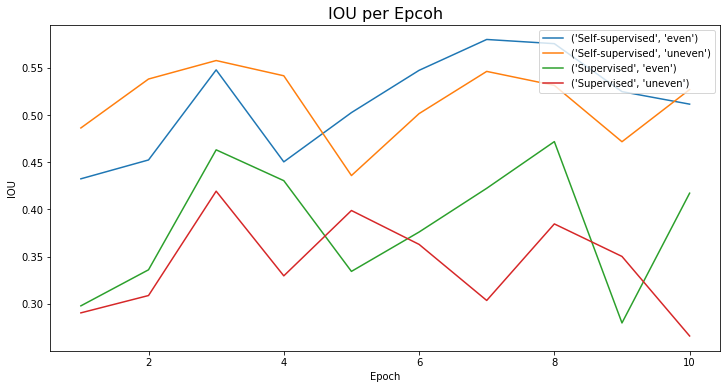

In [29]:
fig, ax = plt.subplots(figsize=(12,6))

for key, grp in df.groupby(['model', 'sampling']):
    ax.plot(grp['epoch'], grp['iou'], label=key)
    
ax.legend()
plt.title("IOU per Epcoh", fontsize=16)
plt.legend(loc='upper right',prop={'size': 10})

plt.xlabel("Epoch")
plt.ylabel("IOU")

In [48]:
df.sort_values(by=["iou"], ascending=False).head(30)

,experiment,model,sampling,epoch,iou,acc,precision,recall
358,experiment9,sup,even,09,0.698617,0.997161,0.768999,0.884168
33,experiment1,sup,even,04,0.680374,0.997125,0.797776,0.822170
82,experiment3,ae,uneven,03,0.672924,0.996804,0.738464,0.883478
387,experiment10,ae,even,08,0.667525,0.996993,0.790408,0.811094
199,experiment5,sup,even,10,0.662410,0.996603,0.717955,0.895421
103,experiment3,ae,even,04,0.659546,0.997001,0.809738,0.780502
229,experiment6,ae,even,10,0.657830,0.997067,0.833095,0.757687
65,experiment2,ae,even,06,0.657163,0.996903,0.788594,0.797694
366,experiment10,ae,uneven,07,0.656317,0.996594,0.724936,0.873956
83,experiment3,ae,uneven,04,0.654142,0.996491,0.710656,0.891609


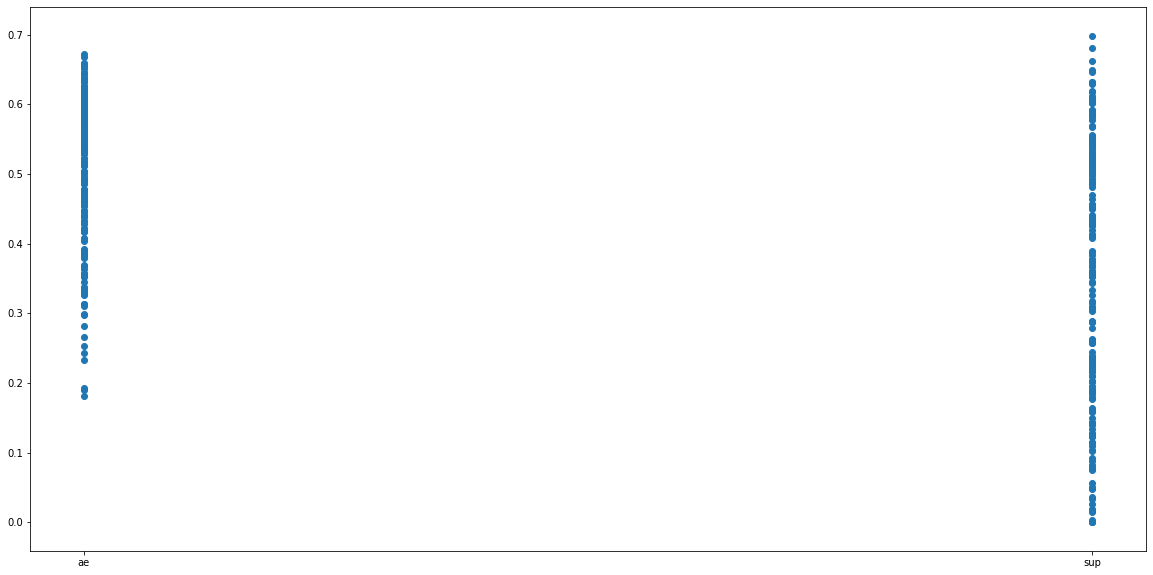

In [19]:
plt.scatter(df.model,df.iou)

## Large experiment

In [499]:
def get_metrics_large(pred_path, mask_path):
    src = rasterio.open(pred_path)
    raw = np.array(src.read())
    y_pred = (raw == 1) # chicken
    y_pred = y_pred.astype(int)
    y_pred = y_pred.squeeze()
    
    src_masked = rasterio.open(mask_path)
    y_true = np.array(src_masked.read())
    y_true = y_true.squeeze()
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    assert tp + tn + fp + fn == y_true.size

    n = tp + fp + tn + fn

    acc = (tp+tn)/n
    recall = (tp/(tp+fn))
    precision = tp / (tp + fp)
    iou = tp /(tp + fn + fp)
    count = np.unique(y_true, return_counts=True)[1]
    pos = 0
    neg = 0
    if (len(count) == 1):
        neg = count[0]
    else:
        neg = count[0]
        pos = count[1]

#     print("IOU: {}".format(iou))
#     print("Accuracy: {}".format(acc))
#     print("Precision: {}".format(precision))
#     print("Recall: {}".format(recall))
    return iou, acc, precision, recall, pos, neg, tp, tn, fp, fn, src_masked.bounds

In [467]:
all_fns = glob.glob('../landcover_scripts/new_md_inference/*')

In [470]:
all_fns[0]

'../landcover_scripts/new_md_inference/m_3807525_sw_18_1_20170611_processed.geojson'

In [479]:
test = rasterio.open(all_fns[0])

In [498]:
test.bounds

BoundingBox(left=412490.0, bottom=4261394.0, right=418636.0, top=4269016.0)

In [502]:
all_metrics = []
count = 0
for fn in all_fns:
    print(count)
    count+=1
    test_filename = "../landcover_scripts/all_test_inference_md/" + (fn.split("/")[3].split(".")[0][:-10]) + "_inference.tif"
    temp = {}
    temp['name'] = (fn.split("/")[3].split(".")[0][:-10])
    temp_metrics = get_metrics_large(test_filename, fn)
    temp['iou'] = temp_metrics[0]
    temp['acc'] = temp_metrics[1]
    temp['precision'] = temp_metrics[2]
    temp['recall'] = temp_metrics[3]
    temp['pos'] = temp_metrics[4]
    temp['neg'] = temp_metrics[5]
    temp['tp'] = temp_metrics[6]
    temp['tn'] = temp_metrics[7]
    temp['fp'] = temp_metrics[8]
    temp['fn'] = temp_metrics[9]
    temp['xmin'] = temp_metrics[10].left
    temp['xmax'] = temp_metrics[10].right
    temp['ymin'] = temp_metrics[10].bottom
    temp['ymax'] = temp_metrics[10].top
    all_metrics.append(temp)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273


RasterioIOError: ../landcover_scripts/all_test_inference_md/m_3807509_nw_18_1_20170611_inference.tif: No such file or directory

In [503]:
df = pd.DataFrame(all_metrics)

In [504]:
df.to_csv('full_res_for_geojson.csv')

In [456]:
df = pd.DataFrame(all_metrics)
chicken_df = df[df.pos != 0]
no_df = df[df.pos == 0]

In [459]:
df.mean()

iou          1.112413e-02
acc          1.428415e-02
precision    1.124236e-02
recall       7.771228e-01
pos          7.182587e+05
neg          4.624567e+07
tp           5.183784e+05
tn           1.517502e+05
fp           4.609392e+07
fn           1.998803e+05
dtype: float64

In [457]:
df.sum()

name         m_3807525_sw_18_1_20170611m_3807543_se_18_1_20...
iou                                                    3.03689
acc                                                    3.89957
precision                                              3.06917
recall                                                 212.155
pos                                                  196084615
neg                                                12625068797
tp                                                   141517299
tn                                                    41427817
fp                                                 12583640980
fn                                                    54567316
dtype: object

In [2]:
df = pd.read_csv("md_inference_res.csv").reset_index(drop=True)
chicken_df = df[df.pos != 0]
no_df = df[df.pos == 0]
df.sum()

Unnamed: 0                                               203841
name          m_3807612_ne_18_1_20170730_inference_m_3907625...
iou                                                     71.2744
acc                                                     637.909
precision                                               126.433
recall                                                  82.5845
pos                                                    10351143
neg                                                 30001255221
tp                                                      5533685
tn                                                  29954833903
fp                                                     46421318
fn                                                      4817458
dtype: object

In [6]:
init_df = pd.read_csv("initial_full_res.csv").reset_index(drop=True)

In [68]:
df['grouping'] = df['name'].astype(str).str[:7]
df.grouping

In [95]:
grouping_df = df.groupby('grouping').sum()

In [96]:
grouping_df

,Unnamed: 0,iou,acc,precision,recall,pos,neg,tp,tn,fp,fn
grouping,,,,,,,,,,,
m_38075,45423,54.452738,153.533980,94.613584,61.979016,8790785,7164870227,4966091,7146825454,18044773,3824694
m_38076,66267,6.834228,199.851735,9.769217,9.576118,283825,9459091867,154713,9452231593,6860274,129112
m_38077,11359,0.000000,32.990622,0.000000,0.000000,0,1580060664,0,1579612984,447680,0
m_39075,14936,6.420655,49.976463,17.153837,6.962545,1137748,2312346268,330071,2312064145,282123,807677
m_39076,61493,3.566737,183.560910,4.895941,4.066865,138785,8623886015,82810,8603338412,20547603,55975
m_39077,4363,0.000000,17.995007,0.000000,0.000000,0,861000180,0,860761315,238865,0


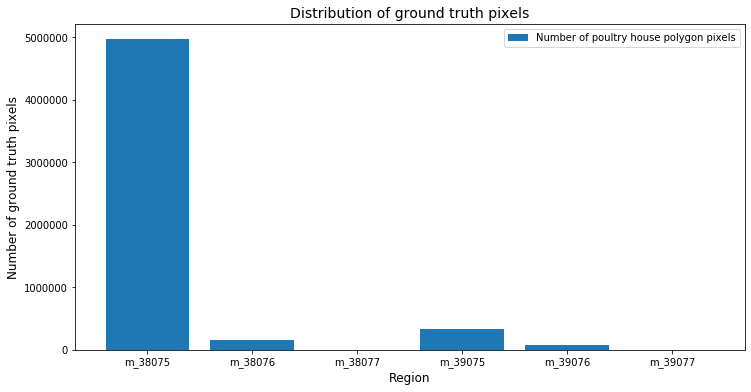

In [98]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(["m_38075", "m_38076", "m_38077", "m_39075", "m_39076", "m_39077"],grouping_df.tp, label="Number of poultry house polygon pixels")
plt.ylabel("Number of ground truth pixels", fontsize=12)
plt.xlabel("Region" % (df.pos.sum()), fontsize=12)
plt.title("Distribution of ground truth pixels", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper right',prop={'size': 10})
plt.show()
plt.close()

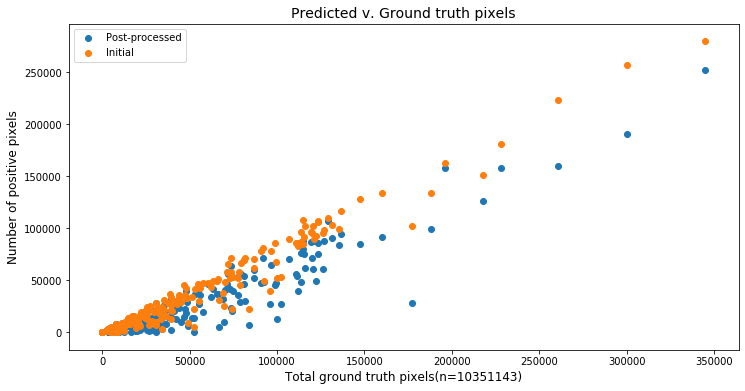

In [39]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df.pos,df.tp, label="Post-processed")
ax.scatter(df.pos, init_df.tp, label="Initial")
plt.ylabel("Number of positive pixels", fontsize=12)
plt.xlabel("Total ground truth pixels(n=%d)" % (df.pos.sum()), fontsize=12)
plt.title("Predicted v. Ground truth pixels", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper left',prop={'size': 10})
plt.show()
plt.close()

In [3]:
chicken_df.mean()

Unnamed: 0    3.067257e+02
iou           2.729975e-01
acc           9.971334e-01
precision     3.186674e-01
recall        6.696732e-01
pos           5.914939e+04
neg           4.650240e+07
tp            4.318401e+04
tn            4.638470e+07
fp            1.177003e+05
fn            1.596538e+04
dtype: float64

In [4]:
chicken_df.mean()

Unnamed: 0    3.067257e+02
iou           2.729975e-01
acc           9.971334e-01
precision     3.186674e-01
recall        6.696732e-01
pos           5.914939e+04
neg           4.650240e+07
tp            4.318401e+04
tn            4.638470e+07
fp            1.177003e+05
fn            1.596538e+04
dtype: float64

## Create geojson from csv

In [516]:
df

,name,iou,acc,precision,recall,pos,neg,tp,tn,fp,fn,xmin,xmax,ymin,ymax
0,m_3807525_sw_18_1_20170611,0.011426,0.011791,0.011465,0.771081,693884,46150928,535041,17323,46133605,158843,412490.0,418636.0,4261394.0,4269016.0
1,m_3807543_se_18_1_20170611,0.008544,0.008957,0.008566,0.770232,517305,46134415,398445,19424,46114991,118860,439532.0,445672.0,4233428.0,4241026.0
2,m_3907624_ne_18_1_20170709,0.010939,0.011990,0.010971,0.789450,639539,45565025,504884,49095,45515930,134655,408578.0,414640.0,4393238.0,4400860.0
3,m_3807635_ne_18_1_20170626,0.004361,0.004594,0.004365,0.808675,256219,47269329,207198,11142,47258187,49021,352406.0,358612.0,4255298.0,4262956.0
4,m_3907557_se_18_1_20170709,0.013861,0.014023,0.013884,0.896019,719042,45769022,644275,7628,45761394,74767,418508.0,424612.0,4316828.0,4324444.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,m_3907664_ne_18_1_20170611,0.016026,0.016488,0.016058,0.888854,839254,45731166,745974,21856,45709310,93280,407762.0,413872.0,4323878.0,4331500.0
269,m_3807636_se_18_1_20170730,0.006809,0.007156,0.006815,0.879685,367095,47075305,322928,16576,47058729,44167,363200.0,369400.0,4248176.0,4255828.0
270,m_3807633_nw_18_1_20170716,0.001871,0.002001,0.001872,0.797555,112164,47709316,89457,6223,47703093,22707,325130.0,331360.0,4255826.0,4263502.0
271,m_3907638_sw_18_1_20170611,0.020102,0.025922,0.020282,0.694362,1344448,45372612,933533,277458,45095154,410915,381254.0,387364.0,4358900.0,4366546.0


In [518]:
df.sum()

name         m_3807525_sw_18_1_20170611m_3807543_se_18_1_20...
iou                                                    3.03689
acc                                                    3.89957
precision                                              3.06917
recall                                                 212.155
pos                                                  196084615
neg                                                12625068797
tp                                                   141517299
tn                                                    41427817
fp                                                 12583640980
fn                                                    54567316
xmin                                               1.05287e+08
xmax                                               1.06966e+08
ymin                                               1.17256e+09
ymax                                               1.17464e+09
dtype: object

In [508]:
# def df_to_geojson(df, lat='latitude', lon='longitude'):
geojson = {'type':'FeatureCollection', 'features':[]}
for _, row in df.iterrows():
    feature = {'type':'Feature',
               'properties':{},
               'geometry':{'type':'Polygon',
                           'coordinates':[]}}
    print(row)
#     feature['geometry']['coordinates'] = [row[lon],row[lat]]
#     for prop in properties:
#         feature['properties'][prop] = row[prop]
#     geojson['features'].append(feature)
#     return geojson

name         m_3807525_sw_18_1_20170611
iou                           0.0114258
acc                           0.0117914
precision                     0.0114647
recall                         0.771081
pos                              693884
neg                            46150928
tp                               535041
tn                                17323
fp                             46133605
fn                               158843
xmin                             412490
xmax                             418636
ymin                        4.26139e+06
ymax                        4.26902e+06
Name: 0, dtype: object
name         m_3807543_se_18_1_20170611
iou                           0.0085444
acc                           0.0089572
precision                    0.00856623
recall                         0.770232
pos                              517305
neg                            46134415
tp                               398445
tn                                19424
fp               

In [519]:
df['grouping'] = df['name'].astype(str).str[:7]
df.grouping
grouping_df = df.groupby('grouping').sum()

In [520]:
grouping_df

,iou,acc,precision,recall,pos,neg,tp,tn,fp,fn,xmin,xmax,ymin,ymax
grouping,,,,,,,,,,,,,,
m_38075,0.678563,0.792583,0.680611,50.510918,39154809,2894112783,31527398,5385470,2888727313,7627411,27935490.0,28321566.0,267725862.0,268204512.0
m_38076,0.587219,0.861190,0.591643,73.860165,39183196,4409473464,27678410,13070583,4396402881,11504786,34501748.0,35083276.0,400616744.0,401335834.0
m_38077,0.088012,0.131843,0.090419,9.975161,6883135,615860637,4108344,2179774,613680863,2774791,4061312.0,4142314.0,55488968.0,55588912.0
m_39075,0.530577,0.537240,0.531659,23.462893,26778037,1176574759,24551739,314869,1176259890,2226298,10971556.0,11129588.0,113145490.0,113343470.0
m_39076,1.116187,1.534760,1.138205,51.685451,81306450,3339815518,51915185,20203079,3319612439,29391265,26809850.0,27256954.0,318003332.0,318561904.0
m_39077,0.036327,0.041956,0.036628,2.659933,2778988,189231636,1736223,274042,188957594,1042765,1006982.0,1031812.0,17579420.0,17610352.0


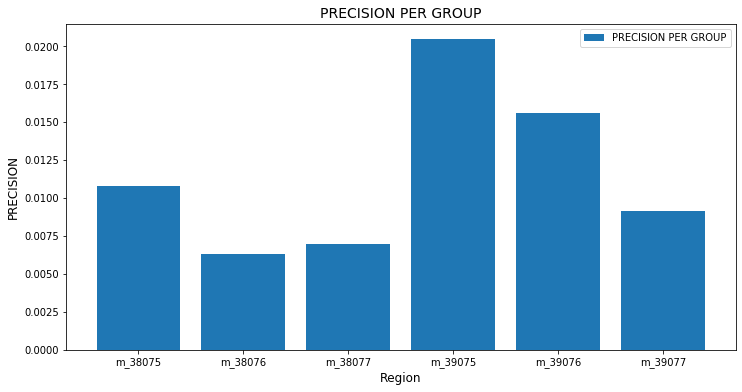

In [528]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(["m_38075", "m_38076", "m_38077", "m_39075", "m_39076", "m_39077"],group_mean_df.precision, label="PRECISION PER GROUP")
plt.ylabel("PRECISION", fontsize=12)
plt.xlabel("Region" % (df.pos.sum()), fontsize=12)
plt.title("PRECISION PER GROUP", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper right',prop={'size': 10})
plt.show()
plt.close()

In [521]:
group_mean_df = df.groupby('grouping').mean()

In [522]:
group_mean_df

,iou,acc,precision,recall,pos,neg,tp,tn,fp,fn,xmin,xmax,ymin,ymax
grouping,,,,,,,,,,,,,,
m_38075,0.010771,0.012581,0.010803,0.801761,6.215049e+05,4.593830e+07,500434.888889,85483.650794,4.585281e+07,121070.015873,443420.476190,449548.666667,4.249617e+06,4.257214e+06
m_38076,0.006247,0.009162,0.006294,0.785746,4.168425e+05,4.690929e+07,294451.170213,139048.755319,4.677024e+07,122391.340426,367039.872340,373226.340426,4.261880e+06,4.269530e+06
m_38077,0.006770,0.010142,0.006955,0.767320,5.294719e+05,4.737390e+07,316026.461538,167674.923077,4.720622e+07,213445.461538,312408.615385,318639.538462,4.268382e+06,4.276070e+06
m_39075,0.020407,0.020663,0.020448,0.902419,1.029924e+06,4.525288e+07,944297.653846,12110.346154,4.524076e+07,85626.846154,421982.923077,428061.076923,4.351750e+06,4.359364e+06
m_39076,0.015290,0.021024,0.015592,0.708020,1.113787e+06,4.575090e+07,711166.917808,276754.506849,4.547414e+07,402620.068493,367258.219178,373382.931507,4.356210e+06,4.363862e+06
m_39077,0.009082,0.010489,0.009157,0.664983,6.947470e+05,4.730791e+07,434055.750000,68510.500000,4.723940e+07,260691.250000,251745.500000,257953.000000,4.394855e+06,4.402588e+06
